In [1]:
#Student ID: 1001420223
#Student name: Aaron Chen
#Instructor: Shion Guha
#Course code: INF2178
#Course name: Experimental Design for Data Science
#Faculty of Information
#University of Toronto
#Technical Assignment 4

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pip install pingouin
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import ancova
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=c3b97cd48da8835d692a61e9242cb91b86fe5d422ceee5825acd4f4cbb95bd89
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load data from google drive (change path if needed)
dataset = pd.read_csv('/content/drive/MyDrive/inf2178/INF2178_A4_data.csv', index_col=0)

In [5]:
dataset.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [6]:
# get a over view of dataset
dataset.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
# since we are not using SES and MMSE we will not be dropping these null value
# check null values
dataset.isna().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [8]:
df = dataset.copy()

In [9]:
# check categories of Group
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [12]:
# check categories of Visit
df['Visit'].unique()

array([1, 2])

In [10]:
# remove all row with converted group
df = df[df['Group'] != 'Converted']

In [13]:
# continous variable
df[['eTIV', 'nWBV']].describe()

,eTIV,nWBV
count,268.000000,268.000000
mean,1482.432836,0.731179
std,179.641213,0.037727
min,1106.000000,0.646000
25%,1351.000000,0.702500
50%,1465.500000,0.733000
75%,1569.000000,0.756000
max,2004.000000,0.837000


<ipython-input-15-1ec9fdad6e44>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#99c2a2'` for the same effect.

  ax = sns.boxplot(x='Group', hue='Visit', y='eTIV', data=df, color='#99c2a2')


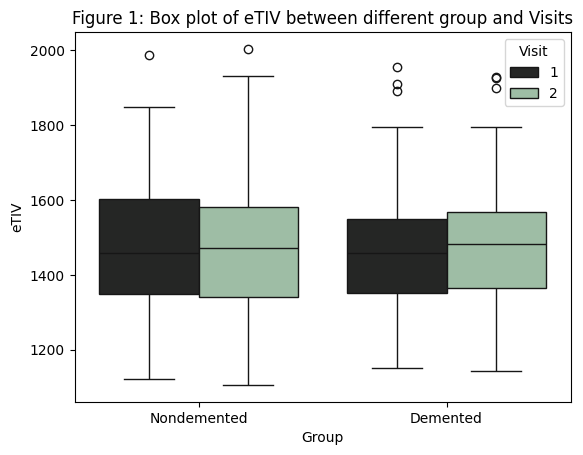

In [15]:
# box plot for eTIV
ax = sns.boxplot(x='Group', hue='Visit', y='eTIV', data=df, color='#99c2a2')
plt.title('Figure 1: Box plot of eTIV between different group and Visits')
plt.show()

<ipython-input-17-7589e9aa566f>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#99c2a2'` for the same effect.

  ax = sns.boxplot(x='Group', hue='Visit', y='nWBV', data=df, color='#99c2a2')


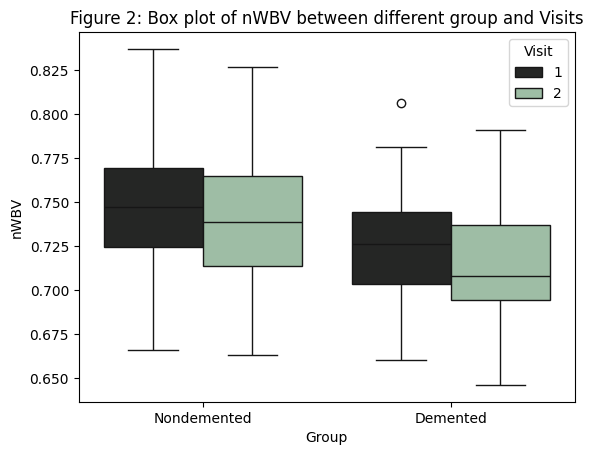

In [17]:
# boxplot for nWBV
ax = sns.boxplot(x='Group', hue='Visit', y='nWBV', data=df, color='#99c2a2')
plt.title('Figure 2: Box plot of nWBV between different group and Visits')
plt.show()

Text(0.5, 1.0, 'Figure 3: Pointplot for eTIV Group and Visit')

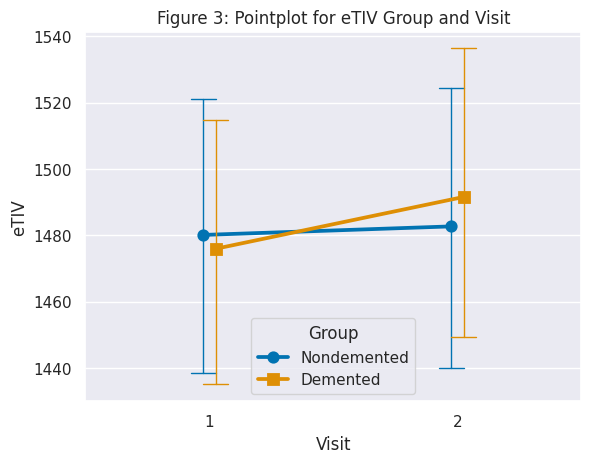

In [18]:
# point plot for eTIV
sns.set()
sns.pointplot(data=df, x='Visit', y='eTIV', hue='Group', dodge=True, markers=['o', 's'],
	      capsize=.1, err_kws={'linewidth': 1}, palette='colorblind').set_title('Figure 3: Pointplot for eTIV Group and Visit')

Text(0.5, 1.0, 'Figure 4: Pointplot for nWBV Group and Visit')

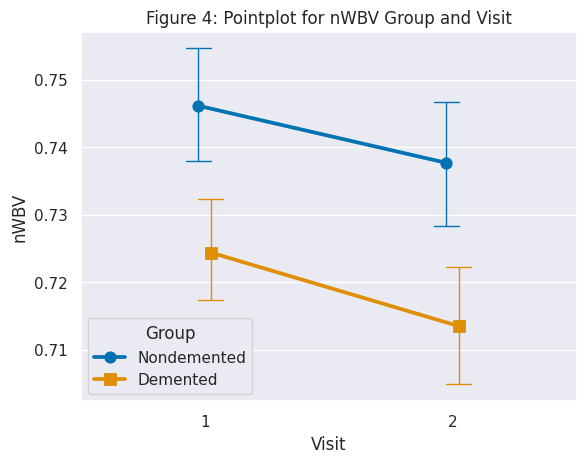

In [19]:
# point plot for nWBV
sns.set()
sns.pointplot(data=df, x='Visit', y='nWBV', hue='Group', dodge=True, markers=['o', 's'],
	      capsize=.1, err_kws={'linewidth': 1}, palette='colorblind').set_title('Figure 4: Pointplot for nWBV Group and Visit')

In [21]:
#### MIXED ANOVA FOR eTIV ####
import pingouin as pg

# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source             SS    DF1    DF2        MS      F    p-unc    np2      eps
-----------  --------  -----  -----  --------  -----  -------  -----  -------
Group        1615.428      1    130  1615.428  0.025    0.875  0.000  nan
Visit        5158.670      1    130  5158.670  7.938    0.006  0.058    1.000
Interaction  1003.366      1    130  1003.366  1.544    0.216  0.012  nan



In [22]:
# post hoc test
posthocs = pg.pairwise_ttests(dv='eTIV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A         B            Paired    Parametric         T      dof  alternative      p-unc    BF10    hedges
-------------  -------  --------  -----------  --------  ------------  ------  -------  -------------  -------  ------  --------
Visit          -        1         2            True      True          -2.812  131.000  two-sided        0.006   4.158    -0.049
Group          -        Demented  Nondemented  False     True           0.159  129.303  two-sided        0.874   0.189     0.027
Visit * Group  1        Demented  Nondemented  False     True           0.034  129.047  two-sided        0.973   0.187     0.006
Visit * Group  2        Demented  Nondemented  False     True           0.280  129.320  two-sided        0.780   0.193     0.048



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [29]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv='eTIV', subject='Subject ID', within='Visit')[-1]

1.0

In [28]:
#test of normality
pg.normality(data=df, dv='eTIV', group='Visit')

,W,pval,normal
Visit,,,
1,0.970077,0.004335,False
2,0.976994,0.024335,False


In [27]:
#test Homogeneity
pg.homoscedasticity(data=df, dv='eTIV', group='Visit')

,W,pval,equal_var
levene,0.055058,0.814666,True


In [30]:
#### MIXED ANOVA FOR nWBV ####

# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.033      1    130  0.033  13.312    0.000  0.093  nan
Visit        0.006      1    130  0.006  81.617    0.000  0.386    1.000
Interaction  0.000      1    130  0.000   2.524    0.115  0.019  nan



In [31]:
# post hoc test
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group',
                              subject='Subject ID', data=df)
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A         B            Paired    Parametric         T      dof  alternative      p-unc               BF10    hedges
-------------  -------  --------  -----------  --------  ------------  ------  -------  -------------  -------  -----------------  --------
Visit          -        1         2            True      True           8.982  131.000  two-sided        0.000  2534000000000.000     0.247
Group          -        Demented  Nondemented  False     True          -3.690  129.436  two-sided        0.000             75.094    -0.633
Visit * Group  1        Demented  Nondemented  False     True          -3.413  129.011  two-sided        0.001             32.393    -0.584
Visit * Group  2        Demented  Nondemented  False     True          -3.856  129.952  two-sided        0.000            127.576    -0.663



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [32]:
#checking assumptions
#mauchly's test of spericity
pg.sphericity(data=df, dv='nWBV', subject='Subject ID', within='Visit')[-1]

1.0

In [33]:
#test of normality
pg.normality(data=df, dv='nWBV', group='Visit')

,W,pval,normal
Visit,,,
1,0.98974,0.416521,True
2,0.98905,0.382209,True


In [34]:
#test Homogeneity
pg.homoscedasticity(data=df, dv='nWBV', group='Visit')

,W,pval,equal_var
levene,0.444219,0.505671,True


In [41]:
# calculate the power directly
from statsmodels.stats.power import TTestIndPower

power = TTestIndPower()
sampleSize = power.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
print('Sample Size: {:.3f}'.format(sampleSize))


Sample Size: 45.451


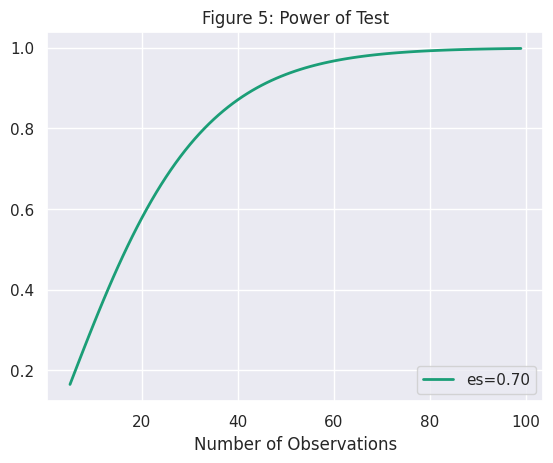

In [44]:
# power analysis varying parameters
effect_sizes = np.array([0.7])
sample_sizes = np.array(range(5, 100))

# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
			effect_size=effect_sizes, alpha=0.05)

plt.title('Figure 5: Power of Test')
plt.show()